In [60]:
#%pip install numpy==1.19.5
#%pip install scipy==1.10.1
#%pip install scikit-learn
#%pip install pandas==1.4.4
#%pip install contourpy==1.1.1
#%pip install matplotlib==3.6
#%pip install keras==2.5.0rc0 tensorflow==2.5.0

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [62]:
import numpy as np
import sklearn
import pandas as pd

In [63]:
print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [64]:
import pandas as pd

In [65]:
training_data = pd.read_csv('as1-bank.csv')

In [66]:
training_data

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,no,1475,yes,no,0,1166,3,530,12,2,no
7838,53,1,2,no,583,no,no,0,226,1,184,4,1,yes
7839,73,1,1,no,2850,no,no,0,300,1,40,8,0,yes
7840,72,1,1,no,5715,no,no,0,1127,5,184,3,1,yes


In [67]:
training_y = training_data.pop('y')
training_y.replace("yes", 1, inplace=True)
training_y.replace("no", 0, inplace=True)
training_x = training_data

C:\Users\avitr\AppData\Local\Temp\ipykernel_22448\1015853388.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  training_y.replace("no", 0, inplace=True)


In [68]:
training_y.value_counts()

y
0    6056
1    1786
Name: count, dtype: int64

In [69]:
training_x = pd.get_dummies(training_x)

In [70]:
#%pip install category_encoders

In [71]:
#from category_encoders import BinaryEncoder

#categorical_columns = ["default","housing", "loan"]

#encoder = BinaryEncoder(cols=categorical_columns)
#training_x = encoder.fit_transform(training_x)

In [72]:
training_x

,age,marital,education,balance,contact,duration,campaign,pdays,previous,poutcome,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,33,1,2,882,1,39,1,151,3,0,True,False,True,False,True,False
1,42,0,1,-247,1,519,1,166,1,2,True,False,False,True,False,True
2,33,1,1,3444,1,144,1,91,4,0,True,False,False,True,True,False
3,36,1,2,2415,1,73,1,86,4,2,True,False,False,True,True,False
4,36,1,2,0,1,140,1,143,3,0,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1,1475,0,1166,3,530,12,2,True,False,False,True,True,False
7838,53,1,2,583,0,226,1,184,4,1,True,False,True,False,True,False
7839,73,1,1,2850,0,300,1,40,8,0,True,False,True,False,True,False
7840,72,1,1,5715,0,1127,5,184,3,1,True,False,True,False,True,False


In [73]:
arr_train_x = training_x.to_numpy()
arr_train_y = training_y.to_numpy()

In [74]:
print(arr_train_x.shape)
print(arr_train_y.shape)

(7842, 16)
(7842,)


In [75]:
arr_train_x.dtype

dtype('O')

In [76]:
arr_train_x = arr_train_x.astype(int)

In [77]:
correlation_matrix = np.corrcoef(arr_train_x, rowvar=False)
print(correlation_matrix)

[[ 1.00000000e+00  4.14199568e-01 -1.80316595e-01  1.17282612e-01
   1.90544858e-01  5.89020045e-02  7.35720702e-04 -1.06095306e-01
   3.39606397e-03 -1.97886497e-02  2.68322609e-02 -2.68322609e-02
   1.86923847e-01 -1.86923847e-01  4.43265433e-03 -4.43265433e-03]
 [ 4.14199568e-01  1.00000000e+00 -1.36804068e-01  2.25149087e-02
   2.17882693e-02  7.14165401e-03  7.43160656e-03  6.62740050e-03
  -4.37036098e-03 -3.78876363e-02 -2.90028573e-03  2.90028573e-03
  -5.08072929e-02  5.08072929e-02 -5.61433819e-02  5.61433819e-02]
 [-1.80316595e-01 -1.36804068e-01  1.00000000e+00  7.93080301e-02
  -9.78062355e-02 -3.05495520e-03 -2.70956534e-02 -1.60156777e-01
   9.88264566e-03  1.48603466e-02  1.06660297e-02 -1.06660297e-02
   1.16913504e-01 -1.16913504e-01  3.07096433e-02 -3.07096433e-02]
 [ 1.17282612e-01  2.25149087e-02  7.93080301e-02  1.00000000e+00
   4.62589922e-02  4.05501473e-02 -1.18735782e-02 -1.01847337e-01
   1.70823043e-03  1.60099042e-02  4.52156993e-02 -4.52156993e-02
   1.09

In [78]:
threshold = 0.3
num_features = correlation_matrix.shape[0]
features_to_remove = set()

for i in range(num_features):
    for j in range(i+1, num_features):
        if abs(correlation_matrix[i, j]) > threshold:
            features_to_remove.add(j)

features_to_remove = list(features_to_remove)
print(features_to_remove)


[1, 11, 12, 13, 15]


In [79]:
reduced_data = np.delete(arr_train_x, features_to_remove, axis=1)
print(reduced_data)

[[  33    2  882 ...    0    1    1]
 [  42    1 -247 ...    2    1    0]
 [  33    1 3444 ...    0    1    1]
 ...
 [  73    1 2850 ...    0    1    1]
 [  72    1 5715 ...    1    1    1]
 [  37    1 2971 ...    2    1    1]]


In [80]:
from sklearn.model_selection import train_test_split

# Train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    reduced_data, arr_train_y, test_size=0.2, random_state=2, shuffle=True)

print(X_train.shape)
print(X_test.shape)

(6273, 11)
(1569, 11)


In [81]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
# model.evaluate(X_test, y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                768       
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_7 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 32)               

157/157 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.7860 - val_loss: 0.4608 - val_accuracy: 0.7490
Epoch 46/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.7917 - val_loss: 0.4601 - val_accuracy: 0.7498
Epoch 47/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.7963 - val_loss: 0.4640 - val_accuracy: 0.7498
Epoch 48/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7921 - val_loss: 0.4597 - val_accuracy: 0.7586
Epoch 49/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.7953 - val_loss: 0.4684 - val_accuracy: 0.7482
Epoch 50/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7955 - val_loss: 0.4621 - val_accuracy: 0.7442
Epoch 51/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7850 - val_loss: 0.4671 - val_accuracy: 0.7418
Epoch

In [82]:
# model = keras.Sequential()

# model.add(layers.InputLayer(input_shape=(11,))) # 16 Columns of input

# model.add(layers.Dense(32, activation="relu"))

# model.add(layers.Dense(1, activation="sigmoid")) # 0->1 floating

# model.summary()

model = keras.Sequential()

model.add(layers.InputLayer(input_shape=(11,)))

model.add(layers.Dense(64, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation="relu"))
model.add(layers.BatchNormalization())

model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 32)               

In [58]:
# model.compile(
#     loss='binary_crossentropy',
#     optimizer='sgd',
#     metrics=['accuracy']
# )

In [54]:
X_train = np.asarray(X_train, np.float32)
X_train = tf.convert_to_tensor(X_train, np.float32)

Y_train = tf.convert_to_tensor(Y_train, np.int32)

In [83]:
# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
157/157 [==============================] - 1s 3ms/step - loss: 0.6955 - accuracy: 0.6473 - val_loss: 0.5265 - val_accuracy: 0.7474
Epoch 2/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7525 - val_loss: 0.5089 - val_accuracy: 0.7434
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7798 - val_loss: 0.5026 - val_accuracy: 0.7442
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4806 - accuracy: 0.7760 - val_loss: 0.5058 - val_accuracy: 0.7458
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7762 - val_loss: 0.4939 - val_accuracy: 0.7442
Epoch 6/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.7866 - val_loss: 0.5026 - val_accuracy: 0.7434
Epoch 7/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4650 - accuracy: 0.7834 - val_loss: 0.4916 - val_accuracy: 0.7442

Epoch 58/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.7880 - val_loss: 0.4639 - val_accuracy: 0.7458
Epoch 59/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7908 - val_loss: 0.4616 - val_accuracy: 0.7490
Epoch 60/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.7923 - val_loss: 0.4598 - val_accuracy: 0.7514
Epoch 61/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7923 - val_loss: 0.4625 - val_accuracy: 0.7490
Epoch 62/100
157/157 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7943 - val_loss: 0.4609 - val_accuracy: 0.7418


In [69]:
model_training_history = model.fit(
    X_train,
    Y_train,
    epochs = 20
)

Epoch 1/20
172/172 [==============================] - 5s 5ms/step - loss: 105.3480 - accuracy: 0.7653
Epoch 2/20
172/172 [==============================] - 1s 8ms/step - loss: 9.9948 - accuracy: 0.7701
Epoch 3/20
172/172 [==============================] - 0s 1ms/step - loss: 6.2464 - accuracy: 0.7723
Epoch 4/20
172/172 [==============================] - 1s 5ms/step - loss: 4.4516 - accuracy: 0.7739
Epoch 5/20
172/172 [==============================] - 1s 4ms/step - loss: 4.1672 - accuracy: 0.7735
Epoch 6/20
172/172 [==============================] - 1s 5ms/step - loss: 2.8550 - accuracy: 0.7737
Epoch 7/20
172/172 [==============================] - 1s 5ms/step - loss: 2.3918 - accuracy: 0.7737
Epoch 8/20
172/172 [==============================] - 1s 4ms/step - loss: 1.7497 - accuracy: 0.7739
Epoch 9/20
172/172 [==============================] - 1s 4ms/step - loss: 2.8217 - accuracy: 0.7741
Epoch 10/20
172/172 [==============================] - 3s 15ms/step - loss: 2.3345 - accuracy: 0.7

In [70]:
print(model_training_history.history.keys())

dict_keys(['loss', 'accuracy'])


In [85]:
import matplotlib.pyplot as plt

ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\avitr\AppData\Roaming\Python\Python39\site-packages\matplotlib\__init__.py)

In [ ]:

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))
acc = model_training_history.history['accuracy']
loss = model_training_history.history['loss']
ax1.plot(acc)
ax2.plot(loss)
ax1.set_ylabel('training accuracy')
ax2.set_ylabel('training loss')
ax2.set_xlabel('epochs')


In [86]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_loss, test_acc)

50/50 [==============================] - 0s 954us/step - loss: 0.4234 - accuracy: 0.7725
0.42338478565216064 0.7724665403366089


In [87]:
y_pred = model.predict(X_test)

50/50 [==============================] - 0s 827us/step


In [88]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(Y_test, np.round(y_pred) ))

tn, fp, fn, tp = confusion_matrix(Y_test, np.round(y_pred) ).ravel()
print(f"TP: {tp}")
print(f"FP: {fp}")
print(f"TN: {tn}")
print(f"FN: {fn}")

[[1160   40]
 [ 317   52]]
TP: 52
FP: 40
TN: 1160
FN: 317


In [89]:
y_pred

array([[0.1576456 ],
       [0.5002137 ],
       [0.10005882],
       ...,
       [0.13652585],
       [0.02723427],
       [0.21761274]], dtype=float32)

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
a  = ConfusionMatrixDisplay.from_predictions(Y_test, np.round(y_pred))

ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\avitr\AppData\Roaming\Python\Python39\site-packages\matplotlib\__init__.py)

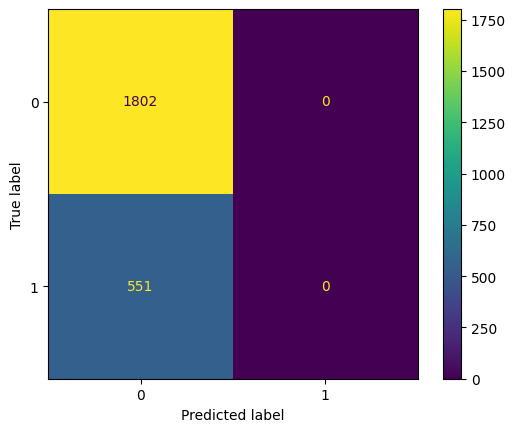

In [51]:
cm = confusion_matrix(Y_test, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()